# Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

# Data Preparation

## Data Load

In [2]:
#Sumber data yang digunakan
path_od = "/Users/rennykurniasari/Downloads/e_commerce_dataset/order_detail.csv"
path_pd = "/Users/rennykurniasari/Downloads/e_commerce_dataset/payment_detail.csv"
path_cd = "/Users/rennykurniasari/Downloads/e_commerce_dataset/customer_detail.csv"
path_sd = "//Users/rennykurniasari/Downloads/e_commerce_dataset/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

## Data Dictionary

Source: https://www.kaggle.com/datasets/rennykurniasari/e-commerce-dataset

> **Order Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
 
> **SKU Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk

> **Customer Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota

> **Payment Detail**

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [3]:
#Menampilkan 5 baris pertama order detail
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1


In [4]:
#Menampilkan 5 baris pertama payment detail
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
#Menampilkan 5 baris pertama customer detail
df_cd.head()

,id,registered_date
0,C269125L,2021-07-16
1,C693630L,2021-07-15
2,C226141L,2021-07-28
3,C996508L,2021-07-10
4,C180415L,2021-07-18


In [6]:
#Menampilkan 5 baris pertama sku detail
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P576453,UnzeLondon_L24273-8,57855.0,42224,Women Fashion
1,P741727,amnaismail_AI KC 34-L,57855.0,39324,Women Fashion
2,P432347,amnaismail_AI KC 34-M,57855.0,44544,Women Fashion
3,P817533,amnaismail_AI KC 37-M,57855.0,35844,Women Fashion
4,P856172,amnaismail_AI KC 37-L,57855.0,35264,Women Fashion


## Feature Engineering & Data Cleansing

In [7]:
#Menjalankan SQL
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

58013

In [8]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
#Menampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100.0,0.0,113100.0,1,1,1,1,cod,kreations_YI 06-L,113100.0,92742,Women Fashion,2021-07-16
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920.0,0.0,13920.0,1,0,0,1,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920.0,10266,Beauty & Grooming,2021-07-15
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660.0,0.0,15660.0,1,0,0,2,jazzvoucher,RS_Habshi Halwa Tin,15660.0,12992,Soghaat,2021-07-15
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100.0,0.0,142100.0,1,0,0,1,cod,Ego_UP0017-999-MR0,142100.0,85260,Women Fashion,2021-07-28
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740.0,0.0,30740.0,1,1,1,1,cod,BT_BT-422,30740.0,26738,Men Fashion,2021-07-28


In [54]:
# Menampilkan kolom yang memuliki null values > 70%
null_columns = df.isnull().mean()
null_columns[null_columns > 0.7]

Series([], dtype: float64)

In [10]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

## Data Type Conversion

In [11]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [12]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

# Data Analysis

## TOP 5 Products from the Mobiles & Tablets Category throughout 2022

In [13]:
#Menyimpan data dalam bentuk Pandas DataFrame
data1 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        #Memfilter data dengan Category = Mobiles & Tablets
                        (df['category']=='Mobiles & Tablets') &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mengambil TOP 5 Produk
                     .head(5)\
                     #Mereset nama header
                     .reset_index(name='qty_2022'))
data1

,sku_name,qty_2022
0,IDROID_BALRX7-Gold,1632
1,IDROID_BALRX7-Jet black,1014
2,IDROID_BALRX7-Jet black,542
3,Mobo_ar1,524
4,Infinix Hot 4-Black,396


/var/folders/vl/nl1mnm6x5ns_3r1h9g13l8nw0000gp/T/ipykernel_11453/2312450315.py:8: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data1.plot(x='sku_name',


<Axes: title={'center': 'TOP 5 Product'}, xlabel='Quantity', ylabel='Product Name'>

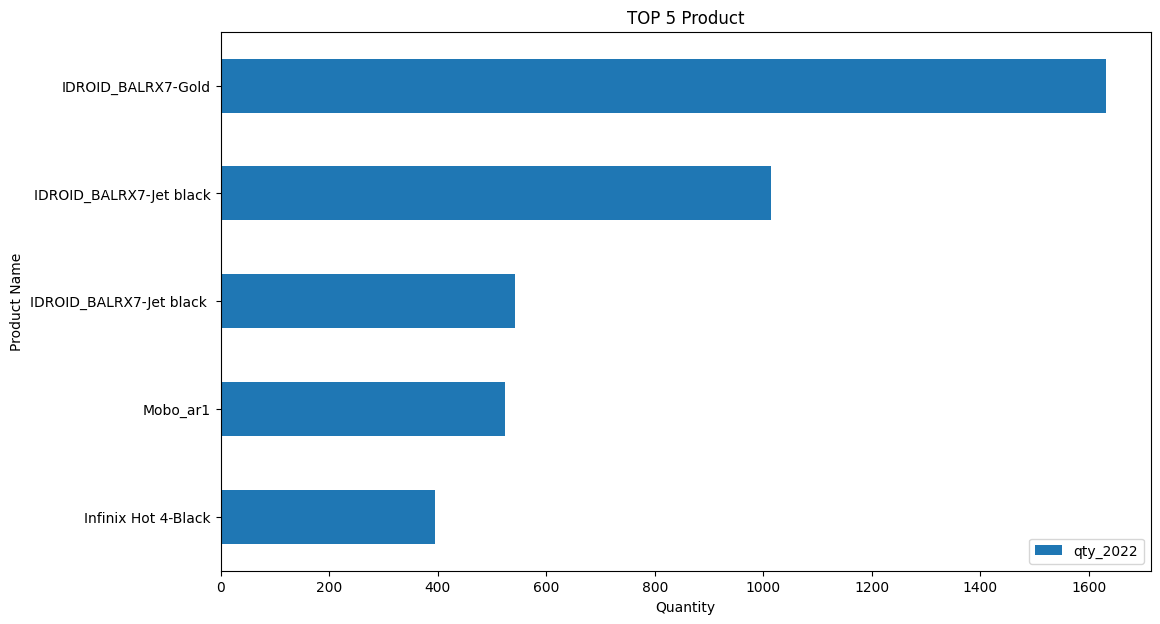

In [14]:
#Sort data untuk dapat digunakan sebagai grafik
data1.sort_values(\
                  by=['qty_2022'], \
                  ascending=True,\
                  inplace=True)

#Membuat grafik
data1.plot(x='sku_name',
           y=['qty_2022'],
           kind='barh',
           xlabel = 'Quantity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Product',
           table = False,
           sort_columns = False,
           secondary_y = False
           )

##  Comparison & Growth of sales quantity of each category between 2021 and 2022
Due to the large remaining stock from the Beauty & Grooming category at the end of 2022

In [15]:
#Menyimpan data dalam bentuk Pandas DataFrame
data2 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_2021'))
data2

,category,qty_2021
0,Men Fashion,22304
1,Soghaat,16523
2,Mobiles & Tablets,14431
3,Beauty & Grooming,11987
4,Women Fashion,7240
5,Appliances,5947
6,Superstore,5274
7,Home & Living,4408
8,Others,4017
9,Health & Sports,3607


In [16]:
#Menyimpan data dalam bentuk Pandas DataFrame
data3 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        #Memfilter data pada transaksi selama 2022
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=["category"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_2022'))
data3

,category,qty_2022
0,Superstore,27905
1,Men Fashion,21904
2,Mobiles & Tablets,20890
3,Women Fashion,17325
4,Soghaat,11491
5,Beauty & Grooming,8005
6,Home & Living,5986
7,Appliances,5651
8,Kids & Baby,5437
9,Health & Sports,4039


In [17]:
data4 = data2.merge(data3, left_on = 'category', right_on = 'category')
data4

,category,qty_2021,qty_2022
0,Men Fashion,22304,21904
1,Soghaat,16523,11491
2,Mobiles & Tablets,14431,20890
3,Beauty & Grooming,11987,8005
4,Women Fashion,7240,17325
5,Appliances,5947,5651
6,Superstore,5274,27905
7,Home & Living,4408,5986
8,Others,4017,2594
9,Health & Sports,3607,4039


In [18]:
data4['qty_growth']=data4['qty_2022']-data4['qty_2021']
data4.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data4

,category,qty_2021,qty_2022,qty_growth
1,Soghaat,16523,11491,-5032
3,Beauty & Grooming,11987,8005,-3982
8,Others,4017,2594,-1423
0,Men Fashion,22304,21904,-400
5,Appliances,5947,5651,-296
11,Computing,2418,2251,-167
13,School & Education,1101,1165,64
14,Books,454,691,237
9,Health & Sports,3607,4039,432
12,Entertainment,1502,2336,834


## TOP 20 product names in Beauty & Grooming category with the highest decrease in 2022 compared to 2021

Since there is a significantly decreased sales quantity in Beauty & Grooming category from 2021 to 2022, we present TOP 20 product names with the highest decrease in 2022 compared to 2021.

In [19]:
#Menyimpan data dalam bentuk Pandas DataFrame
data5 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Beauty & Grooming') &\
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_bg_2021'))
data5

,sku_name,qty_bg_2021
0,kcc_krone deal,1583
1,kcc_glamour deal,535
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268
3,emart_Nova Straightener + Curler,245
4,kcc_blaze,239
...,...,...
1304,TO_066-2 IN 1 MAKE UP BRUSH,1
1305,TO_073-The Balm Cosmetics Mary-Lou Manizer,1
1306,TO_080-BUNDLE DEAL CONTOUR & BLENDER,1
1307,TO_083-PACK OF 2 ADS EYELINER GEL,1


In [20]:
#Menyimpan data dalam bentuk Pandas DataFrame
data6 = pd.DataFrame(\
                     #Memfilter data dengan valid=1
                     df[(df['is_valid']==1) &\
                        (df['category']=='Beauty & Grooming') &\
                        #Memfilter data pada transaksi selama 2021
                        ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     #Mengelompokan data berdasarkan nama produk
                     .groupby(by=["sku_name"])["qty_ordered"]\
                     #Pengelompokan berdasarkan penjumlahan
                     .sum()\
                     #Mengurutkan data berdasarkan nilai kuantitas paling banyak
                     .sort_values(ascending=False)\
                     #Mereset nama header
                     .reset_index(name='qty_bg_2022'))
data6

,sku_name,qty_bg_2022
0,kcc_krone deal,448
1,kcc_glamour deal,175
2,un_Beauty Care Bundle_BC,103
3,BO_All-In-One Manicure Set,100
4,nabila_Nchant FOR Olive,90
...,...,...
1807,SFEVER_CH369HB0EHEHSNAFAMZ,1
1808,SFEVER_CH813HB0FO4AWNAFAMZ,1
1809,SFEVER_CH813HB0G7EO4NAFAMZ,1
1810,SFEVER_CH813HB0U0NZCNAFAMZ,1


In [21]:
#Menggabungkan data
data7 = data5.merge(data6, left_on = 'sku_name', right_on = 'sku_name')
data7['qty_bg_growth']=data7['qty_bg_2022']-data7['qty_bg_2021']
data7.sort_values(by=['qty_bg_growth'],ascending=True,inplace=True)
data7 = data7.head(20)
data7

,sku_name,qty_bg_2021,qty_bg_2022,qty_bg_growth
0,kcc_krone deal,1583,448,-1135
1,kcc_glamour deal,535,175,-360
2,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,268,2,-266
4,kcc_blaze,239,4,-235
5,emart_Ding Ling Trimmer rf 608,214,2,-212
3,emart_Nova Straightener + Curler,245,35,-210
7,kcc_jazzy,208,47,-161
6,itter_AB 1211,213,77,-136
9,Bold_Fresh,135,9,-126
8,Bold_Active,135,11,-124


## Customer ID and registered date of customers who have checked out but have not made a payment during 2022

In [22]:
#Menyimpan data dalam bentuk Pandas DataFrame
data8 = df[\
            #Memfilter data dengan gross=1
            (df['is_gross']==1) &\
            #Memfilter data dengan valid=0
            (df['is_valid']==0) &\
            #Memfilter data dengan net=0
            (df['is_net']==0) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]

In [23]:
# #Menyimpan data dalam bentuk Pandas DataFrame
# data8 = pd.DataFrame(df[\
#             #Memfilter data dengan gross=1
#             (df['is_gross']==1) &\
#             #Memfilter data dengan valid=0
#             (df['is_valid']==0) &\
#             #Memfilter data dengan net=0
#             (df['is_net']==0) &\
#             #Memfilter data pada transaksi selama 2022
#             ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
#             .groupby(by=['customer_id'])['registered_date'].unique())

In [24]:
data8

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
276,ODR3752452906s,C996508L,2022-04-01,P824901,980142,1,980142,58000,922142,1,0,0,4,Payaxis,Infinix-Hot-S-Grey,980142,646874,Mobiles & Tablets,2021-07-10
279,ODR8094598392d,C996508L,2022-06-01,P691892,730742,1,730742,0,730742,1,0,0,1,cod,Infinix Hot 4-Black,730742,533426,Mobiles & Tablets,2021-07-10
280,ODR8094598392d,C996508L,2022-06-01,P691892,730742,1,730742,0,730742,1,0,0,1,cod,Infinix Hot 4-Black,730742,533426,Mobiles & Tablets,2021-07-10
286,ODR4250096249c,C996508L,2022-01-31,P313303,550942,1,550942,0,550942,1,0,0,4,Payaxis,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2021-07-10
294,ODR3287872934i,C996508L,2022-08-02,P313303,550942,1,550942,0,550942,1,0,0,4,Payaxis,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2021-07-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287243,ODR1843978364r,C125653L,2022-08-13,P669314,8294,1,8294,0,8294,1,0,0,1,cod,e-seller_195,8294,5046,Mobiles & Tablets,2022-08-09
287245,ODR9898514039j,C173391L,2022-08-13,P883866,263494,1,263494,0,263494,1,0,0,1,cod,GA_CT-167-136042,263494,189660,Women Fashion,2022-08-26
287246,ODR7149038174r,C173393L,2022-08-13,P135360,69542,1,69542,0,69542,1,0,0,4,Payaxis,Romoss_1015,69542,50054,Mobiles & Tablets,2022-08-03
287247,ODR7149038174r,C173393L,2022-08-13,P581969,28420,1,28420,0,28420,1,0,0,4,Payaxis,BO_Pack-of-05-Sky-Lantern-Multicolored,28420,19024,Home & Living,2022-08-03


In [25]:
data9 = data8[['customer_id','registered_date']]
data9

,customer_id,registered_date
276,C996508L,2021-07-10
279,C996508L,2021-07-10
280,C996508L,2021-07-10
286,C996508L,2021-07-10
294,C996508L,2021-07-10
...,...,...
287243,C125653L,2022-08-09
287245,C173391L,2022-08-26
287246,C173393L,2022-08-03
287247,C173393L,2022-08-03


In [26]:
data9.to_csv('audience_list.csv', encoding='utf-8-sig', index=False)
print("CSV file saved as 'audience_list.csv'")

CSV file saved as 'audience_list.csv'


## Overall profit growth in 2021 vs 2022

In [27]:
#Menghitung profit
df['profit'] = df['after_discount'] - df['cogs']

In [28]:
#Menyimpan data dalam bentuk Pandas DataFrame
data10 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]

In [29]:
#Menyimpan data dalam bentuk Pandas DataFrame
data11 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            #Memfilter data pada transaksi selama 2021
            ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]

In [30]:
#Membuat Dataframe dan Summary
data12 = {\
          'Profit Period':'Total',\
          '2021': data11['profit'].sum(), \
          '2022': data10['profit'].sum(),\
          'Growth (Value)': data10['profit'].sum() - data11['profit'].sum(),\
          'Growth': pd.Series(round(((data10['profit'].sum() - data11['profit'].sum())/data11['profit'].sum())*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data12, index=[0])

,Profit Period,2021,2022,Growth (Value),Growth
0,Total,3044341855,5153155179,2108813324,69.27%


## Profit Growth (%) by Product Category in 2021 vs 2022

In [31]:
#Menggunakan Groupby untuk menjumlahkan
data13 = pd.DataFrame(data10\
                     .groupby(by="category")["profit"].sum()\
                     .sort_values(ascending=False)\
                     .reset_index(name='profit_2022'))
data13

,category,profit_2022
0,Mobiles & Tablets,2972334731
1,Appliances,497790138
2,Women Fashion,408306607
3,Entertainment,316810200
4,Men Fashion,234632719
5,Superstore,225547431
6,Computing,133779051
7,Beauty & Grooming,94244754
8,Home & Living,84116394
9,Soghaat,62756359


In [32]:
data14 = pd.DataFrame(data11\
                     .groupby(by="category")["profit"].sum()\
                     .sort_values(ascending=False)\
                     .reset_index(name='profit_2021'))
data14

,category,profit_2021
0,Mobiles & Tablets,1570556101
1,Appliances,388136061
2,Men Fashion,245341028
3,Entertainment,200529969
4,Women Fashion,145004578
5,Computing,89620746
6,Beauty & Grooming,83353396
7,Home & Living,73542298
8,Soghaat,72174592
9,Superstore,50548595


In [33]:
#Menggabungkan data
data15 = data14.merge(data13, left_on = 'category', right_on = 'category')
data15

,category,profit_2021,profit_2022
0,Mobiles & Tablets,1570556101,2972334731
1,Appliances,388136061,497790138
2,Men Fashion,245341028,234632719
3,Entertainment,200529969,316810200
4,Women Fashion,145004578,408306607
5,Computing,89620746,133779051
6,Beauty & Grooming,83353396,94244754
7,Home & Living,73542298,84116394
8,Soghaat,72174592,62756359
9,Superstore,50548595,225547431


In [34]:
#Melakukan kalkulasi
data15['Growth (Value)'] = data15['profit_2022']-data15['profit_2021']
data15['Growth (%)'] = round(data15['Growth (Value)']/data15['profit_2021']*100,2)
data15.sort_values(by=['Growth (%)'], ascending = False, inplace = True)
data15

,category,profit_2021,profit_2022,Growth (Value),Growth (%)
9,Superstore,50548595,225547431,174998836,346.20
4,Women Fashion,145004578,408306607,263302029,181.58
0,Mobiles & Tablets,1570556101,2972334731,1401778630,89.25
3,Entertainment,200529969,316810200,116280231,57.99
5,Computing,89620746,133779051,44158305,49.27
1,Appliances,388136061,497790138,109654077,28.25
7,Home & Living,73542298,84116394,10574096,14.38
10,Health & Sports,48849715,55628929,6779214,13.88
6,Beauty & Grooming,83353396,94244754,10891358,13.07
12,Kids & Baby,26996299,30286302,3290003,12.19


/var/folders/vl/nl1mnm6x5ns_3r1h9g13l8nw0000gp/T/ipykernel_11453/1930539026.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data15.plot(x='category',


<Axes: title={'center': 'Growth 2021 vs 2022'}, xlabel='Category', ylabel='Growth (%)'>

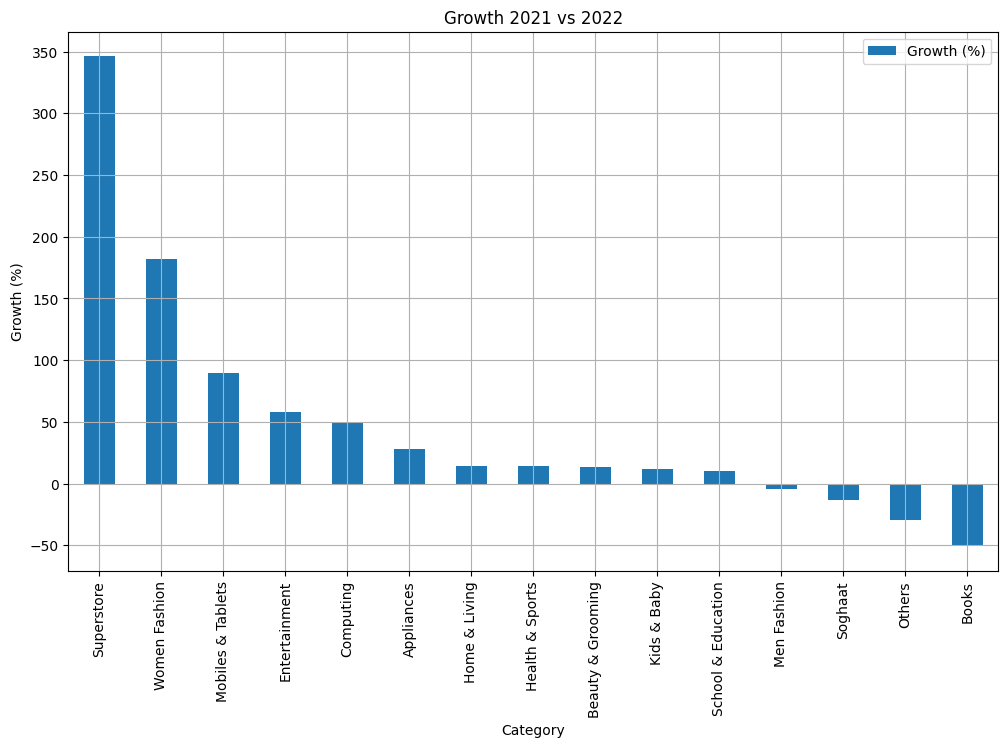

In [35]:
#Membuat grafik
data15.plot(x='category',
           y=['Growth (%)'],
           kind='bar',
           grid = True,
           title = 'Growth 2021 vs 2022',
           xlabel = 'Category',
           ylabel = 'Growth (%)',
           figsize=(12,7),
           rot = 90,
           table = False,
           sort_columns = False,
           secondary_y = False)

## Average daily weekend sales (Saturday and Sunday) vs. average daily sales weekdays (Monday-Friday) per month throughout 2022

In [36]:
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,profit,day,month,month_num
0,ODR8723933690j,C269125L,2021-01-07,P268025,113100,1,113100,0,113100,1,...,cod,kreations_YI 06-L,113100,92742,Women Fashion,2021-07-16,20358,Thursday,January,1
1,ODR4598875560c,C693630L,2021-01-07,P767128,13920,1,13920,0,13920,1,...,cod,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,13920,10266,Beauty & Grooming,2021-07-15,3654,Thursday,January,1
2,ODR8911603924d,C693630L,2021-11-25,P512707,15660,1,15660,0,15660,1,...,jazzvoucher,RS_Habshi Halwa Tin,15660,12992,Soghaat,2021-07-15,2668,Thursday,November,11
3,ODR9378341541o,C226141L,2021-01-07,P238882,142100,1,142100,0,142100,1,...,cod,Ego_UP0017-999-MR0,142100,85260,Women Fashion,2021-07-28,56840,Thursday,January,1
4,ODR1386982371d,C226141L,2022-05-19,P206879,30740,1,30740,0,30740,1,...,cod,BT_BT-422,30740,26738,Men Fashion,2021-07-28,4002,Thursday,May,5


In [37]:
data16 = pd.DataFrame(df[(df['is_valid']==1) \
                        & (df['day'].isin(['Saturday','Sunday']))\
                        & (df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .round()\
                     .sort_values(ascending=False)\
                     .reset_index(name='avg_profit_weekend'))
data16

,month_num,month,avg_profit_weekend
0,2,February,214281.0
1,5,May,208437.0
2,1,January,197972.0
3,7,July,169175.0
4,12,December,168817.0
5,9,September,164873.0
6,3,March,162998.0
7,4,April,156517.0
8,11,November,138973.0
9,10,October,124681.0


In [38]:
data17 = pd.DataFrame(df[(df['is_valid']==1) \
                        & (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday']))\
                        & (df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31')]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .sort_values(ascending=False)\
                     .round()\
                     .reset_index(name='avg_profit_weekdays'))
data17

,month_num,month,avg_profit_weekdays
0,9,September,850539.0
1,3,March,185331.0
2,1,January,184474.0
3,2,February,174799.0
4,10,October,168393.0
5,8,August,165806.0
6,5,May,155492.0
7,11,November,154603.0
8,6,June,149632.0
9,4,April,147262.0


In [39]:
data18 = data16.merge(data17, left_on = 'month', right_on = 'month')
data18.sort_values(by='month_num_x',ascending=True, inplace=True)
data18 = data18[["month","avg_profit_weekend","avg_profit_weekdays"]]
data18

,month,avg_profit_weekend,avg_profit_weekdays
2,January,197972.0,184474.0
0,February,214281.0,174799.0
6,March,162998.0,185331.0
7,April,156517.0,147262.0
1,May,208437.0,155492.0
11,June,94235.0,149632.0
3,July,169175.0,125668.0
10,August,113892.0,165806.0
5,September,164873.0,850539.0
9,October,124681.0,168393.0


<Axes: xlabel='Category', ylabel='Total'>

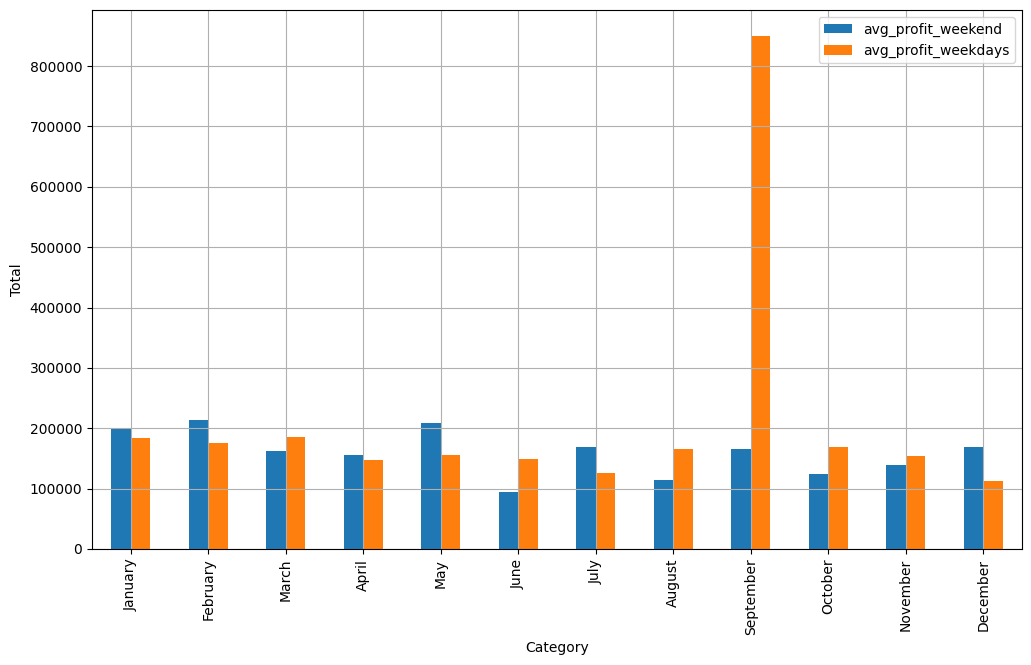

In [40]:
data18.plot(x='month',
           y=['avg_profit_weekend','avg_profit_weekdays'],
           kind='bar',
           grid = True,
           xlabel = 'Category',
           ylabel = 'Total',
           figsize=(12,7),
           rot = 90,
           table = False,
           secondary_y = False)

## Average daily sales weekends (Saturday and Sunday) vs. average daily sales weekdays (Monday-Friday) overall from October to December 2022

In [41]:
#Menyimpan data dalam bentuk Pandas DataFrame
data19 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            (df['day'].isin(['Saturday','Sunday'])) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [42]:
#Menyimpan data dalam bentuk Pandas DataFrame
data20 = df[\
            #Memfilter data dengan valid=1
            (df['is_valid']==1) &\
            (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday'])) &\
            #Memfilter data pada transaksi selama 2022
            ((df['order_date'] >= '2022-10-01') & (df['order_date'] <= '2022-12-31'))]

In [43]:
data21 = {\
          'Periode':'Total 3 months',\
          'Avg Weekend Sales': round(data19['before_discount'].mean(),2), \
          'Avg Weekdays Sales': round(data20['before_discount'].mean(),2),\
          'Diff (Value)': round(data19['profit'].mean() - data20['profit'].mean(),2),\
          'Diff (%)': pd.Series(round(((data19['profit'].mean() - data20['profit'].mean())/data19['profit'].mean())*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data21, index=[0])

,Periode,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,136301.11,143687.84,-745.91,-2.26%


## AOV every month during 2021 vs 2022

In [44]:
data22 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     .groupby(by=['month_num','month'])["before_discount"].sum()\
                     .round()\
                     .reset_index(name='sales_2022'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data22

,month_num,month,sales_2022
0,1,January,1577227762
1,2,February,1512559408
2,3,March,2314882193
3,4,April,2223917288
4,5,May,3803696734
5,6,June,1366975717
6,7,July,1773954449
7,8,August,740712197
8,9,September,1548445294
9,10,October,494201049


In [45]:
data23 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))]\
                     .groupby(by=['month_num','month'])["id"].nunique()\
                     .round()\
                     .reset_index(name='order_2022'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data23

,month_num,month,order_2022
0,1,January,4799
1,2,February,4790
2,3,March,6922
3,4,April,6348
4,5,May,9037
5,6,June,5219
6,7,July,6278
7,8,August,2412
8,9,September,1692
9,10,October,1772


In [46]:
data24 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     .groupby(by=['month_num','month'])["before_discount"].sum()\
                     .round()\
                     .reset_index(name='sales_2021'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data24

,month_num,month,sales_2021
0,1,January,393963352
1,2,February,269498794
2,3,March,277998494
3,4,April,251696051
4,5,May,275985904
5,6,June,294017782
6,7,July,1076526211
7,8,August,1283552029
8,9,September,1729388535
9,10,October,1441307055


In [47]:
data25 = pd.DataFrame(df[(df['is_valid']==1) & ((df['order_date'] >= '2021-01-01') & (df['order_date'] <= '2021-12-31'))]\
                     .groupby(by=['month_num','month'])["id"].nunique()\
                     .round()\
                     .reset_index(name='order_2021'))\
                     .sort_values(by=['month_num'],ascending=True)\
                     .head(12)
data25

,month_num,month,order_2021
0,1,January,1331
1,2,February,1119
2,3,March,1101
3,4,April,1080
4,5,May,992
5,6,June,974
6,7,July,3132
7,8,August,4019
8,9,September,5282
9,10,October,4428


In [48]:
from sqlite3 import connect
conn = connect(':memory:')
data22.to_sql('sales_2022', conn, index=False, if_exists='replace')
data23.to_sql('order_2022', conn, index=False, if_exists='replace')
data24.to_sql('sales_2021', conn, index=False, if_exists='replace')
data25.to_sql('order_2021', conn, index=False, if_exists='replace')

12

In [49]:
data26 = pd.read_sql("""
SELECT
    sales_2021.*,
    order_2021.order_2021,
    sales_2022.sales_2022,
    order_2022.order_2022
FROM sales_2022
LEFT JOIN order_2022
    on order_2022.month_num = sales_2022.month_num
LEFT JOIN sales_2021
    on sales_2021.month_num = sales_2022.month_num
LEFT JOIN order_2021
    on order_2021.month_num = sales_2022.month_num
""", conn)
data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022
0,1,January,393963352,1331,1577227762,4799
1,2,February,269498794,1119,1512559408,4790
2,3,March,277998494,1101,2314882193,6922
3,4,April,251696051,1080,2223917288,6348
4,5,May,275985904,992,3803696734,9037
5,6,June,294017782,974,1366975717,5219
6,7,July,1076526211,3132,1773954449,6278
7,8,August,1283552029,4019,740712197,2412
8,9,September,1729388535,5282,1548445294,1692
9,10,October,1441307055,4428,494201049,1772


In [50]:
data26['AOV 2021'] = round(data26['sales_2021']/data26['order_2021'],2)
data26['AOV 2022'] = round(data26['sales_2022']/data26['order_2022'],2)
data26['Diff AOV (value)']= data26['AOV 2022']-data26['AOV 2021']
data26['Diff AOV (%)'] = round((data26['AOV 2022']-data26['AOV 2021'])/data26['AOV 2021']*100,2)
data26

,month_num,month,sales_2021,order_2021,sales_2022,order_2022,AOV 2021,AOV 2022,Diff AOV (value),Diff AOV (%)
0,1,January,393963352,1331,1577227762,4799,295990.50,328657.59,32667.09,11.04
1,2,February,269498794,1119,1512559408,4790,240838.96,315774.41,74935.45,31.11
2,3,March,277998494,1101,2314882193,6922,252496.36,334423.89,81927.53,32.45
3,4,April,251696051,1080,2223917288,6348,233051.90,350333.54,117281.64,50.32
4,5,May,275985904,992,3803696734,9037,278211.60,420902.59,142690.99,51.29
5,6,June,294017782,974,1366975717,5219,301866.31,261922.92,-39943.39,-13.23
6,7,July,1076526211,3132,1773954449,6278,343718.46,282566.81,-61151.65,-17.79
7,8,August,1283552029,4019,740712197,2412,319371.00,307094.61,-12276.39,-3.84
8,9,September,1729388535,5282,1548445294,1692,327411.69,915156.79,587745.10,179.51
9,10,October,1441307055,4428,494201049,1772,325498.43,278894.50,-46603.93,-14.32


<Axes: xlabel='Month', ylabel='AOV'>

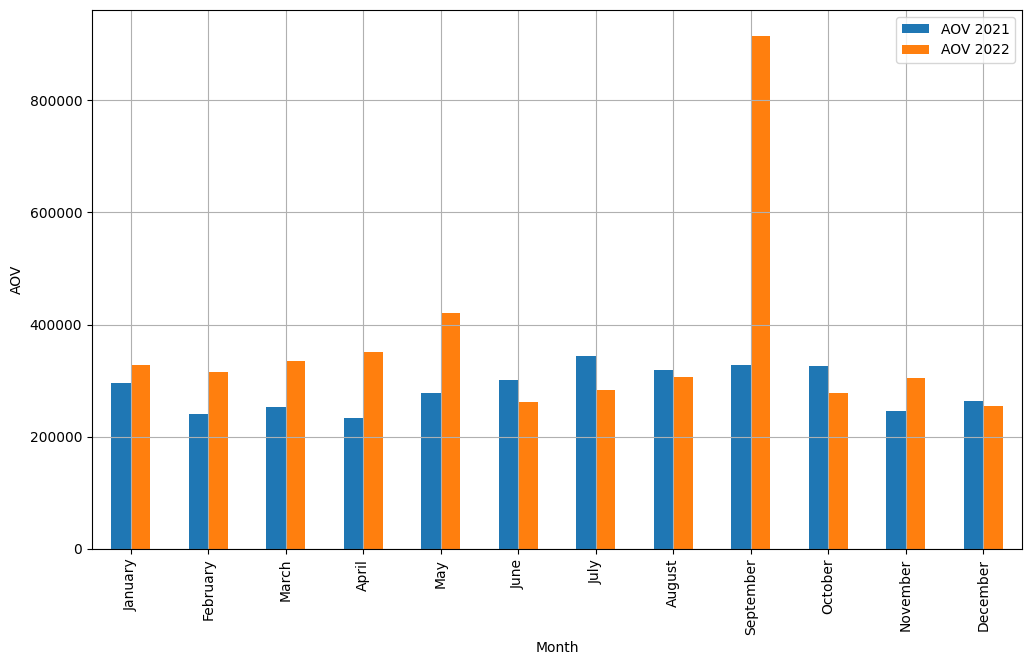

In [51]:
data26.plot(x='month',
           y=['AOV 2021','AOV 2022'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'AOV',
           figsize=(12,7),
           rot = 90,
           table = False,
           secondary_y = False)

## Overall AOV 2021 vs 2022

In [52]:
aov_2021 = round(data26['sales_2021'].sum()/data26['order_2021'].sum(),2)
aov_2022 = round(data26['sales_2022'].sum()/data26['order_2022'].sum(),2)
data27 = {\
          'Period':'Total',\
          'AOV 2021': aov_2021, \
          'AOV 2022': aov_2022, \
          'Growth (value)': aov_2022-aov_2021,\
          'Growth': pd.Series(round((aov_2022-aov_2021)/aov_2021*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data27, index=[0])

,Period,AOV 2021,AOV 2022,Growth (value),Growth
0,Total,277568.15,347186.56,69618.41,25.08%
